In [1]:
import os
import sys
import pandas as pd
import yfinance as yf
import numpy as np
sys.path.append(os.path.join('Momentum_additional_files'))

from config import *
from helper import *
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

price_data_df = collecting_data(START_DATE, END_DATE, DATA_OPEN_LOC, DATA_DIV_LOC)
relative_df = get_relative(price_data_df)

# Calculate momentum strategy

In [2]:
open_positions, total_gained_valued = momentum_strategy(price_data_df, relative_df)
avg_gain, p_value = calc_one_sided_test(open_positions)  
print(f'Average gain:{avg_gain}. The p-value: {p_value}')

Average gain:-11.819352357999541. The p-value: 0.34822553615076024


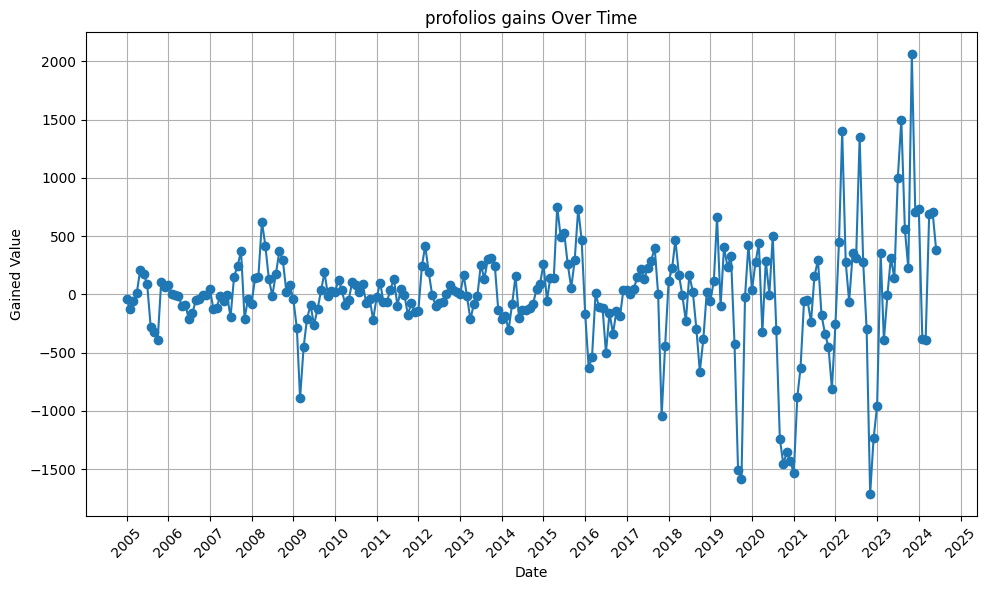

In [3]:
plot_profolios(open_positions)   

In [4]:
b_date, e_date = calc_profolios_dates(START_DATE, END_DATE, FORMATION_PERIOD_MONTHS, HOLDING_PERIOD_MONTHS)
sp500 = yf.download('^GSPC', start=b_date, end=e_date, interval='1mo')[STOCK_TIME]
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
sp500_returns = sp500.pct_change().dropna()

strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in open_positions.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Annualized Return: -0.0564
Volatility: 0.1864
Sharpe Ratio: -16.2057
Max Drawdown: -0.8200
VaR 1%: -0.1283
VaR 5%: -0.0868
Alpha: -0.7609


# Sub group of dates 2004-2017 mometum strategy

In [5]:
end_date = '2017-12-31'
sub_relative_df = relative_df.loc[:end_date]
sub_open_positions, sub_total_gained_valued = momentum_strategy(price_data_df, sub_relative_df)
sub_avg_gain, sub_p_value = calc_one_sided_test(sub_open_positions)  
print(f'Average gain:{sub_avg_gain}. The p-value: {sub_p_value}')

Average gain:12.128172450736841. The p-value: 0.2570592194467385


In [6]:
strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in sub_open_positions.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Annualized Return: -0.0385
Volatility: 0.2019
Sharpe Ratio: -14.8723
Max Drawdown: -0.7195
VaR 1%: -0.1701
VaR 5%: -0.0812
Alpha: -0.5474


# Stock prices Over Time'

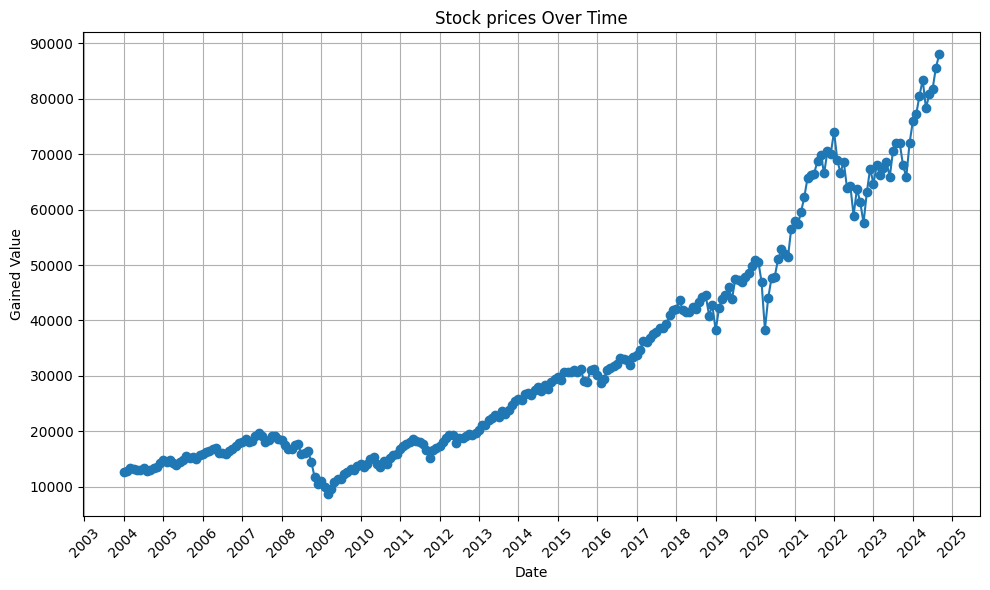

In [7]:
df = price_data_df['Open'] + price_data_df['Dividends']
df = df.sum(axis=1)
plt.figure(figsize=(10, 6))
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.values, marker='o', linestyle='-')
plt.title('Stock prices Over Time')
plt.xlabel('Date')
plt.ylabel('Gained Value')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout() 
plt.show()